# I. Introduction 

## 1. Problem area 

In the digital age, social media has become an integral part of our lives, reshaping the way we connect and communicate. It has profoundly impacted our their lives in both positive and negative ways. Social media provides a platform for self-expression and social interaction. It allows people from all walks of life to share their stories, ideas, and creativity. Unfortunately, the emergence of social media has also brought about mental health concerns. The constant exposure to carefully curated images and the pressure to present an idealised version of oneself could potentially breed negative feelings of inadequacy, low self-esteem, and anxiety. There has been an alarmingly high rise in mental health issues such as depression, eating disorders and anxiety among youths, presenting a pressing concern that demands immediate attention. A recent study conducted by the National Institute of Mental Health (NIMH) reported that the prevalence of mental health disorders among individuals aged 12 to 17 has increased by 50% over the past decade (NIMH, 2022). These staggering statistics indicate a significant and troubling trend, highlighting the urgent need to address the mental well-being. 
To address this problem, I will be carrying out sentimental analysis on a social media post dataset, use it to train and develop a machine learning model to predict sentiments of textual data to detect signs of mental illness. 
The domain of this project is Mental Health and Sentiment Analysis. The challenge lies in accurately identifying and classifying the sentiment expressed in the form of social media posts and associating it with potential mental health issues. 

## 2. Objectives 

The objectives of the project is as follows: 

1. Carry out Exploratory Data Analysis: To gain preliminary understanding and insight of the dataset, identify patterns detect anomalies and extract meaningful information that aid in building the machine learning model. The findings will be visualised for clearer representation. EDA helps formulating hypotheses, guide feature engineering, and aids in selecting appropriate models for my project. 


2. Build a high performance mental health prediction model. The primary objective is conduct sentiment analysis on a collection of social media data to determine the sentiment (positive or negative) expressed in social media posts. A sentiment analysis model will be trained to classify text based on their emotional tone. 

The National Alliance on Mental Illness (NAMI) states that early detection and treatment can significantly mitigate the progression and reduce the impact of mental illnesses, leading to improved recovery rates and a greater likelihood of achieving long-term wellness. The project aims to provide an automated and scalable solution for early detection, which can have a significant impact on individuals' mental well-being and contribute to the field of mental health assessment.


This project intersects sentiment analysis and mental health contributing towards the advancement of proactive mental health assessment. In terms of novelty, this project stands out as it integrates sentiment analysis and mental health detection. While these areas have been explored independently, the combination to identify signs of mental issues using social media text is relatively unique.

## 3. Dataset

The Mental Health Corpus dataset I will be using for this project is a collection of texts related to people with anxiety, depression, and other mental health issues. The dataset is in csv file format and was obtained from Kaggle.com. It was compiled by Kaggle user REIHANEH NAMDARI. She is Kaggle certified Datasets Expert, which indicates the reliability of the dataset to a certain extent. However, as there is no mention of where the data was derived from, the dataset may not be fully credible. Thus, the dataset will be cleaned, preprocessed and explored in further detail before the model is trained to output the most accurate results possible. The dataset contains 27972 rows of data and 2 columns "text" and "label" (in 0s and 1s). The label indicates the sentiment of the text, with 1 being toxic and 0 being harmless. The datatypes of the 2 columns are objects (strings) and integer respectively. 


## 4. Evaluation methodology

The evaluation methodology for this sentiment analysis project will involve assessing the performance of the models and analyzing the results obtained from the investigations. Various evaluation metrics will be utilized to measure the effectiveness of each model's predictions.

The 3 algorithms I will be using to build the machine learning models are Naive Bayes, Random Forest and Long Short Term Memory. 

For the Naive Bayes and Random Forest classifiers, precision, recall, and F1-score will be employed. Precision measures the proportion of correctly predicted positive instances out of the total instances predicted as positive. Recall calculates the proportion of correctly predicted positive instances out of the total actual positive instances. F1-score is the combined mean of precision and recall, providing a balanced evaluation metric. These metrics help gauge and evaluate the accuracy of the sentiment analysis models.

In addition, the validation loss and accuracy graphs will be plotted for the models. These graphs will track the changes in the performance of the model over each training epoch. The validation loss displays the discrepancy between the predicted and actual sentiment labels. The accuracy graph reflects the proportion of correctly classified instances.

For the LSTM model, accuracy and recall will be used as evaluation metrics. Accuracy measures the overall proportion of correctly classified instances. Recall calculates the proportion of correctly predicted positive instances out of the total actual positive instances. These metrics provide insight into the model's performance in terms of identifying sentiments accurately.

To test the predictions on a random, custom text input, a function can be created. This function would take the text as input and pass it through the trained sentiment analysis model and output a predicted sentiment. The model predicts a sentiment score and if it is lower than a certain threshold, the function would return 'negative' as its output. This allows for real-time prediction and assessment of sentiment.

By utilising precision, recall, F1-score, accuracy, and plotting validation loss and accuracy graphs, a comprehensive analysis of the sentiment analysis models' performance can be done. An assessment of the models'ability to accurately classify sentiments related to mental health issues, offers insightful information about the models' efficacy and applicability in real-world scenarios.

# II. Implementation

## 5. Preprocessing

### Import necessary libraries and modules

In [1]:
!pip install gensim 
!pip install keras

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn import model_selection, svm 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from scikitplot.metrics import plot_confusion_matrix, plot_roc 

import tensorflow as tf 
from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Input, Bidirectional, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM 
from keras import utils 
from keras.callbacks import ReduceLROnPlateau, EarlyStopping 
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
#from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer 

import gensim 

import re 
import string 
from wordcloud import WordCloud 
from collections import Counter 
import os 
import logging 
import time 
import pickle 
import itertools 

2023-07-16 19:43:28.566777: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load the dataset

In [3]:
data = pd.read_csv("mental_health.csv")
data.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


### Exploring the dataset

#### Data shape

In [4]:
print(data.shape)

(27977, 2)


#### Check for any data with missing labels 

In [5]:
data.isnull().sum()

text     0
label    0
dtype: int64

Thankfully, all the data is labelled accordingly so there is no need to clean the data. 

#### Checking the labels

In [6]:
data['label'].value_counts()

0    14139
1    13838
Name: label, dtype: int64

#### Checking the data types for each feature in the dataset 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB


#### Create a new column that will indicate the sentiment as POSITIVE or NEGATIVE 

In [8]:
data['sentiment'] = data.loc[:, 'label']

In [9]:
# map the numerical labels to a textual label 
decode_map = {0: "POSITIVE", 1: "NEGATIVE"}

def decode_sentiment(sentiment):
    return decode_map[int(sentiment)]

In [10]:
data.sentiment = data.sentiment.apply(lambda x: decode_sentiment(x))

In [11]:
data.head()

,text,label,sentiment
0,dear american teens question dutch person hear...,0,POSITIVE
1,nothing look forward lifei dont many reasons k...,1,NEGATIVE
2,music recommendations im looking expand playli...,0,POSITIVE
3,im done trying feel betterthe reason im still ...,1,NEGATIVE
4,worried year old girl subject domestic physic...,1,NEGATIVE


#### Plot a piechart and a barplot to visualise the proportion of the 2 labels in the dataset 

Counter({'POSITIVE': 14139, 'NEGATIVE': 13838})


<function matplotlib.pyplot.show(close=None, block=None)>

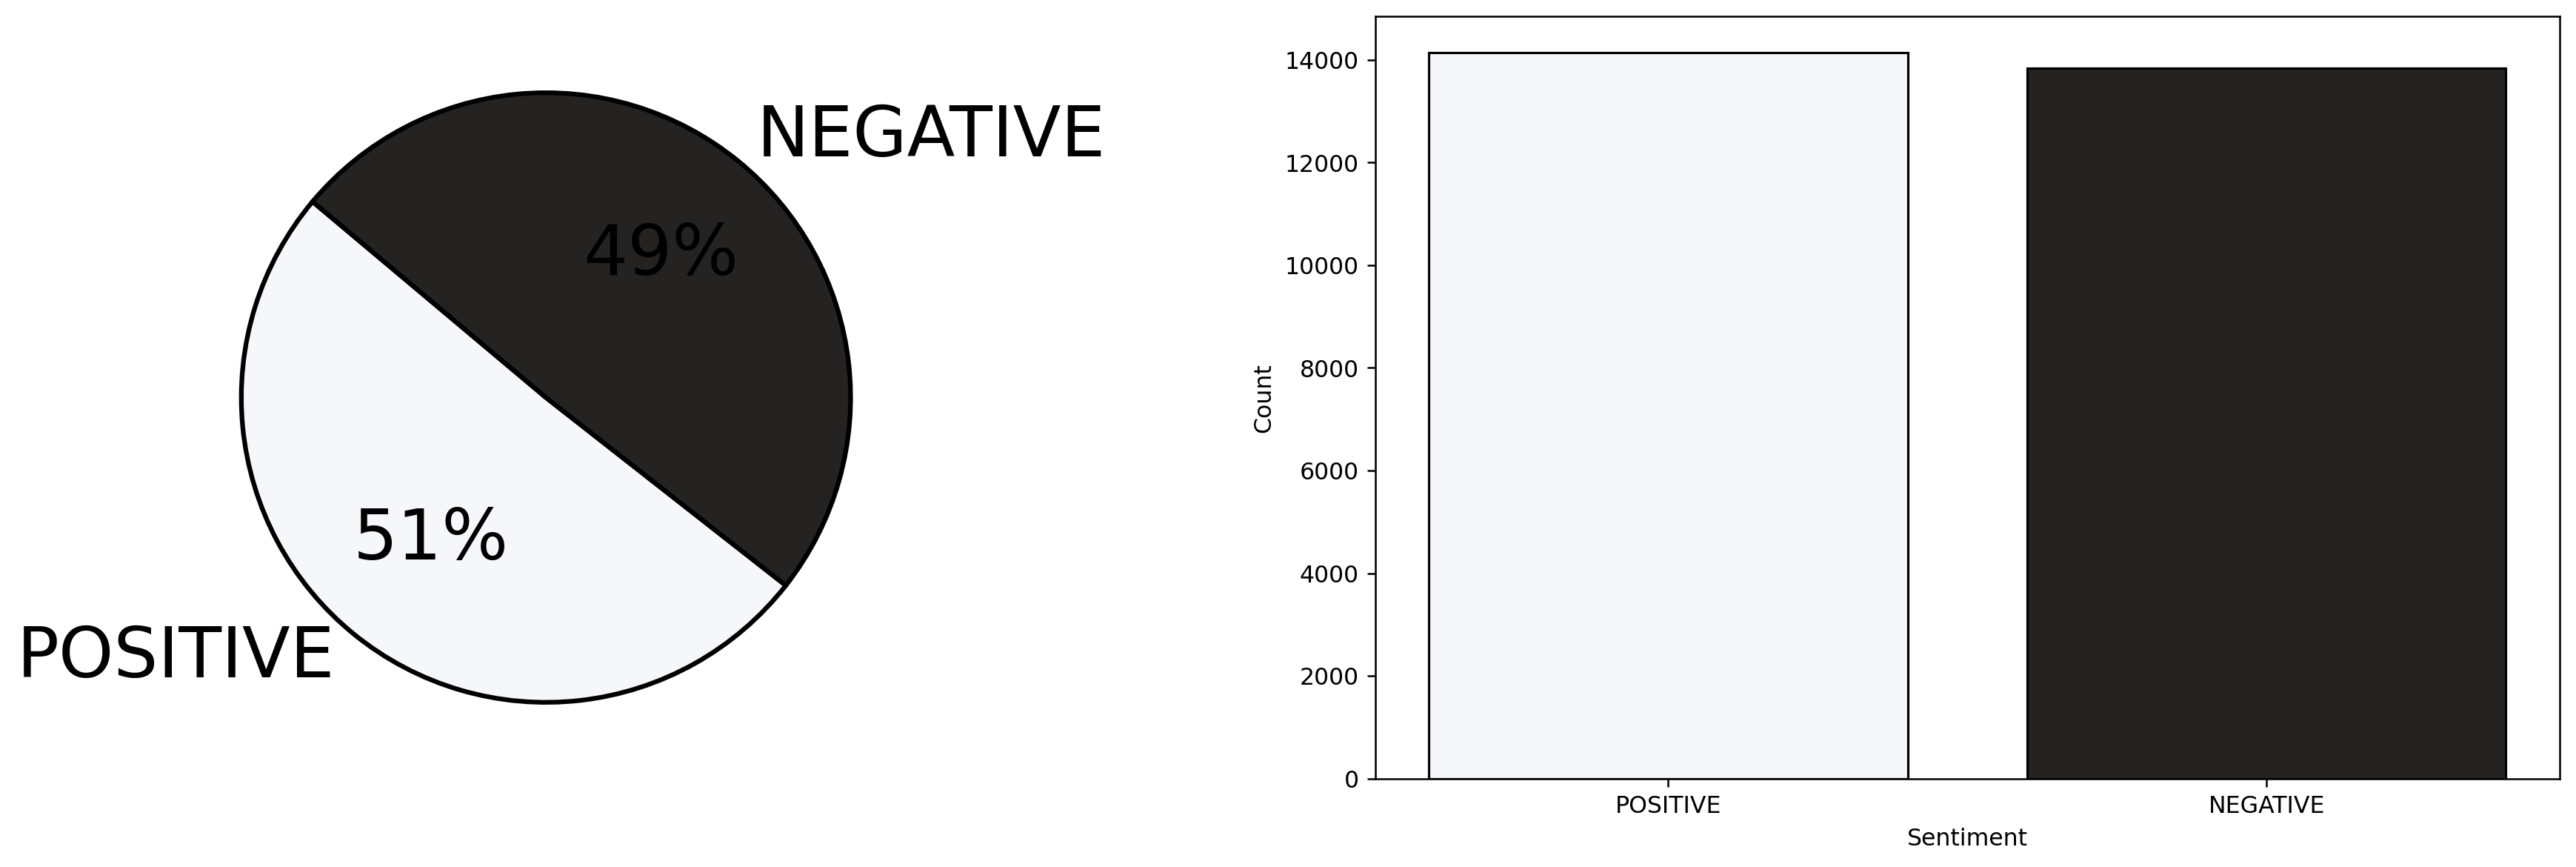

In [12]:
# predefine settings
labels = ["POSITIVE", "NEGATIVE"]
sizes = [14139, 13838]
custom_colors = ['#F6F7FA', '#242321']

# plot pie chart
plt.figure(figsize=(20,6), dpi=227)
plt.subplot(1,2,1)
abc=plt.pie(sizes, labels=labels, textprops={'fontsize': 30}, startangle=140,autopct='%1.0f%%', colors=custom_colors, wedgeprops={"edgecolor": "black", "linewidth": 2})
_,_, autotexts = abc
for autotext in autotexts:
    autotext.set_color("black")

label_counter = Counter(data.sentiment) #output: Counter({'POSITIVE': 14139, 'NEGATIVE': 13838})
print(label_counter)

# plot bar chart
plt.subplot(1,2,2)
plt.bar(label_counter.keys(),label_counter.values(), color=custom_colors, edgecolor="black")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show

#### Creating new columns "Word Count" and "Character Count"

In [13]:
# Word Count column
data['Word Count'] = data["text"].apply(lambda x: len(x.split()))

# function for counting the number of characters in an input text
def char_count(text):
    char = 0 
    for word in text.split():
        char +=len(word)
    return char 

# Character Count column
data['Character Count'] = data["text"].apply(char_count)

In [14]:
data.head()

,text,label,sentiment,Word Count,Character Count
0,dear american teens question dutch person hear...,0,POSITIVE,23,112
1,nothing look forward lifei dont many reasons k...,1,NEGATIVE,20,98
2,music recommendations im looking expand playli...,0,POSITIVE,64,387
3,im done trying feel betterthe reason im still ...,1,NEGATIVE,100,493
4,worried year old girl subject domestic physic...,1,NEGATIVE,311,1819


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suhyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text preprocessing 

#### Case Standardisation
change all text to lowercase

In [16]:
def lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(lowercase)

#### Remove stopwords
Stopwords are a set of commonly used words in languages that do not carry significant meaning for sentiment analysis. Words such as "the", "is", "and" are examples of stopwords. Removing stopwords helps reduce noise which improves the efficiency and accuracy of the sentiment analysis model by focusing on more informative words.

In [17]:
# stop_words = stopwords.words("english")

# def remove_stopwords(text):
#     tokens = []
#     for word in text.split():
#         if word not in stop_words:
#             tokens.append(word)
#     return ' '.join(tokens)

def remove_stopwords(text):
    """a function for removing the stopword"""
    sw = stopwords.words('english')
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)


data['text'] = data['text'].apply(remove_stopwords)
#print(data['text'])

#### Remove URLs
URLs do not generalise across samples and contributes to noise. We can remove URLs using regular expressions. Removing URLs allows that the machine learning model to focuses solely on the textual content of the data, enhancing the quality of sentiment classification.

In [18]:
def remove_urls(text):
    urls = re.compile("(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*")
    return urls.sub('', text)

data['text'] = data['text'].apply(remove_urls)
#print(data['text'])

#### Remove punctuations
Punctuations such as periods, commas and exclamation marks do not convey sentiment and may interfere with the accurate analysis of the text. Removing punctuations standardises the input and eliminates unnecessary noise from the data.

In [19]:
punct = string.punctuation

def remove_punct(text):
    return text.translate(str.maketrans('', '', punct))

data['text'] = data['text'].apply(remove_punct)

#### Stemming
Stemming is the process of reducing words to their root or base form. It helps to consolidate different forms of the same word, such as "running," "runs," and "ran," into a common representation like "run." Stemming reduces the vocabulary size and ensures that variations of words are treated as the same, enabling better analysis and classification of sentiment.<br>
Snowball stemmer was utilised for stemming. Snowball stemmer was chosen over other stemming algorithms like Porter stemmer due to its versatility in handling various languages, which is advantageous for this sentimental analysis on text data. 

In [20]:
def text_stemming(text):
    stemmer = SnowballStemmer(language="english")
    stem_words = []
    words = word_tokenize(text)
    for word in words:
        stem_words.append(stemmer.stem(word))
    return " ".join(stem_words)
    
data['text'] = data['text'].apply(text_stemming)
#print(data['text'])

In [21]:
# after stemming 
data["Total words after transformation"] = data['text'].apply(lambda x: np.log(len(x.split())))

data.head()

,text,label,sentiment,Word Count,Character Count,Total words after transformation
0,dear american teen question dutch person heard...,0,POSITIVE,23,112,3.135494
1,noth look forward lifei dont mani reason keep ...,1,NEGATIVE,20,98,2.944439
2,music recommend im look expand playlist usual ...,0,POSITIVE,64,387,4.110874
3,im done tri feel betterth reason im still aliv...,1,NEGATIVE,100,493,4.574711
4,worri year old girl subject domest physicalmen...,1,NEGATIVE,311,1819,5.690359


### Data Visualisation 

#### Word Cloud for Positive Sentiments
Word Clouds were used to visually represent the most frequent words that were categorised as positive sentiments. It provides an intuitive overview of the prominent sentiments and identify sentiment-specific keywords. The words are displayed in varying sizes based on their frequency. 

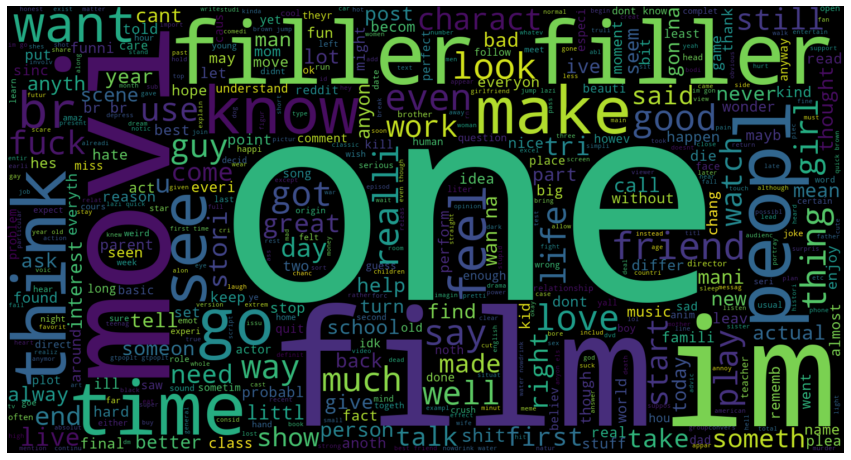

In [22]:
text = " ".join(data[data['sentiment']=='POSITIVE']['text']) 

plt.figure(figsize=(15,10))
wordcloud = WordCloud(max_words=500, height=800, width=1500, background_color="black", colormap="viridis").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Word Cloud for Negative Sentiments 
Word Clouds were used to visually represent the most frequent words that were categorised as negative sentiments.

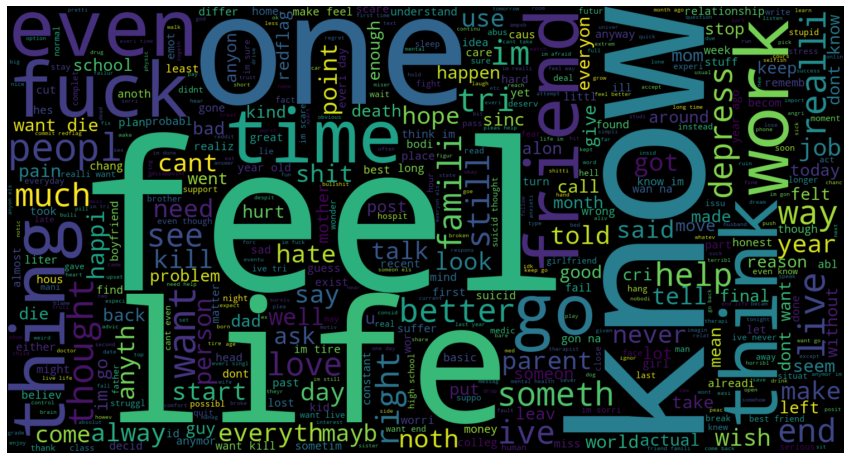

In [23]:
text = " ".join(data[data['sentiment']=='NEGATIVE']['text'])

plt.figure(figsize=(15,10))
wordcloud = WordCloud(max_words=500, height=800, width=1500, background_color='black', colormap='viridis').generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Word Frequency for Positive Sentiments
Analysing the word frequency provides insights into the most commonly used words that were categorised as positive sentiments. A horizontal bar chart is plotted to graphically represent the top 20 words used in positive sentimens.

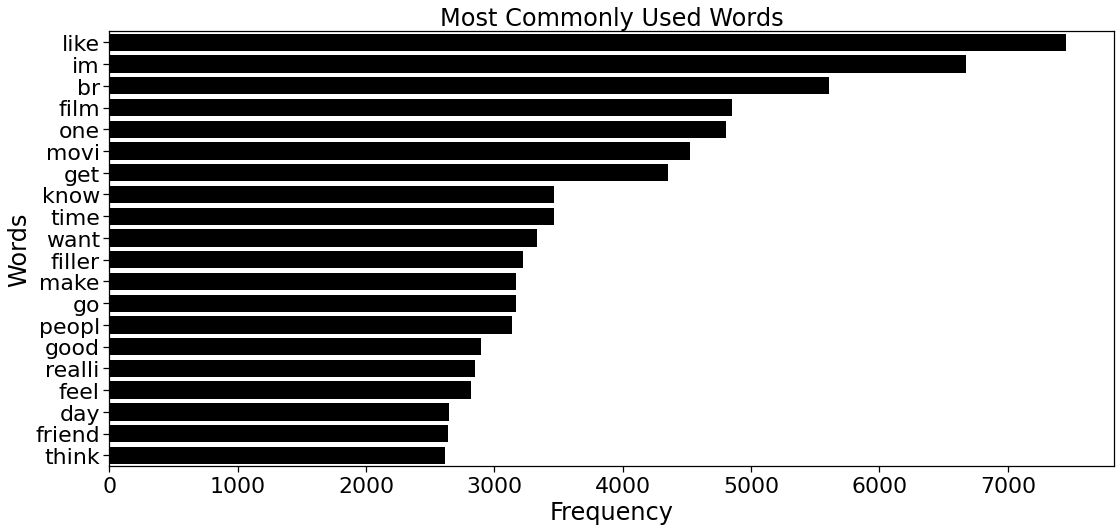

In [24]:
# count frequency of each distinct word 
wordfreq_positive = []
for sentence in data[data['sentiment']=='POSITIVE']['text'].to_list():
    for word in sentence.split():
        wordfreq_positive.append(word)
        
# List top 20 words     
df=pd.DataFrame(Counter(wordfreq_positive).most_common(20), columns = ['Word', 'Frequency'])

# Plot horizontal bar chart
sns.set_context('notebook', font_scale=2)
plt.figure(figsize=(18,8))
sns.barplot(y=df['Word'], x=df['Frequency'], color="black")
plt.title("Most Commonly Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

#### Word Frequency for Negative Sentiments
A word frequency bar chart is plotted to graphically represent the top 20 words used in negative sentimens.

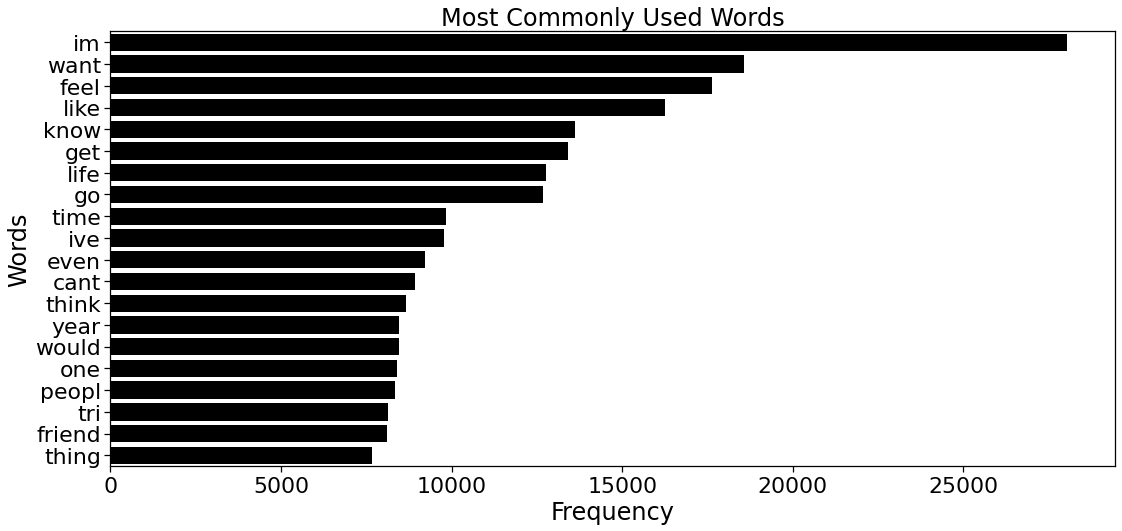

In [25]:
# count frequency of each distinct word 
wordfreq_negative = []
for sentence in data[data['sentiment']=='NEGATIVE']['text'].to_list():
    for word in sentence.split():
        wordfreq_negative.append(word)

# List top 20 words 
df=pd.DataFrame(Counter(wordfreq_negative).most_common(20), columns=['Word', 'Frequency'])

# Plot horizontal bar chart
sns.set_context('notebook', font_scale=2)
plt.figure(figsize=(18,8))
sns.barplot(y=df['Word'], x=df['Frequency'], color="black")
plt.title("Most Commonly Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

## 6. Baseline performance
A baseline model serves as a starting point for comparison in machine learning tasks, representing a simple or default approach to establish a performance benchmark. 

#### Split data into train and test sets
The dataset is divided into training and testing sets in a 80:20 ratio. The training set is used for training the model and the testing set is used as a collection of data points that will help to assess the performance of the model in generalising new, unseen data. 

In [26]:
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

#### Feature Extraction using TF-IDF
Term Frequency-Inverse Document Frequency (TF-IDF) transformation is applied to the training and testing data. TF-IDF calculates the importance of each word based on its frequency in the document and across the dataset. It captures the significance of words specific to each document while considering their overall frequency.

In [27]:
# calculates the term frequency-inverse document frequency weights for each word in the data 

#top 2500 most frequent words as features
tfidf = TfidfVectorizer(max_features=2500, min_df=2)

# fit TfidfVectorizer on X_train to transform into TF-IDF matrix  
# contains the TF-IDF transformed training data.
X_train= tfidf.fit_transform(X_train).toarray() # convert it to dense array using .toarray(). 

# fit TfidfVectorizer on X_test to transform into TF-IDF matrix
X_test= tfidf.transform(X_test).toarray()

In [28]:
# contains the TF-IDF transformed test data
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y_test

array([0, 0, 0, ..., 0, 1, 0])

#### Naive Bayes
I have chosen to use the Naive Bayes classifier for my baseline model. Naive Bayes was chosen as it is simple to implement, trains fast, and has good performance with text data. Naive Bayes is computationally efficient and assumes independence between feature. This makes it suitable for sentiment analysis tasks since TF-IDF can help capture the discriminative power of words independently by weighing words by occurrence. There are 5 types of NB models under the scikit-learn library - Gaussian, Multinomial, Bernoulli, Complement and Categorical. <br>
<br>
I will be using the Mulitnomial Naive Bayes model for this project. Multinomial Naive Bayes classifier is the most suitable for NLP as it is used for classification with discrete features like word counts for text classification. 

#### Train and evaluate the model

In [30]:
from sklearn.metrics import classification_report

def train_model(model):
    # train model using X_train and the corresponding y_train labels
    model.fit(X_train, y_train)
    # apply model to X_test to predict labels
    y_pred = model.predict(X_test)
    # predict probabilities of the test data belonging to each class 
    y_prob = model.predict_proba(X_test)

    # display metrics: precision, recall, F1-score, and support
    print(classification_report(y_test, y_pred))
    
    sns.set_context('notebook', font_scale=1.3)
    fig, ax=plt.subplots(1,2, figsize=(25,8))
    
    # plot confusion matrix
    ax1=plot_confusion_matrix(y_test, y_pred, ax=ax[0], cmap='YlGnBu')
    # plot ROC curve
    ax2=plot_roc(y_test, y_prob, ax=ax[1], plot_macro=False, plot_micro=False, cmap='summer')

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      2828
           1       0.84      0.96      0.90      2768

    accuracy                           0.89      5596
   macro avg       0.90      0.89      0.89      5596
weighted avg       0.90      0.89      0.89      5596



/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/scikitplot/metrics.py:156: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(mappable=image)


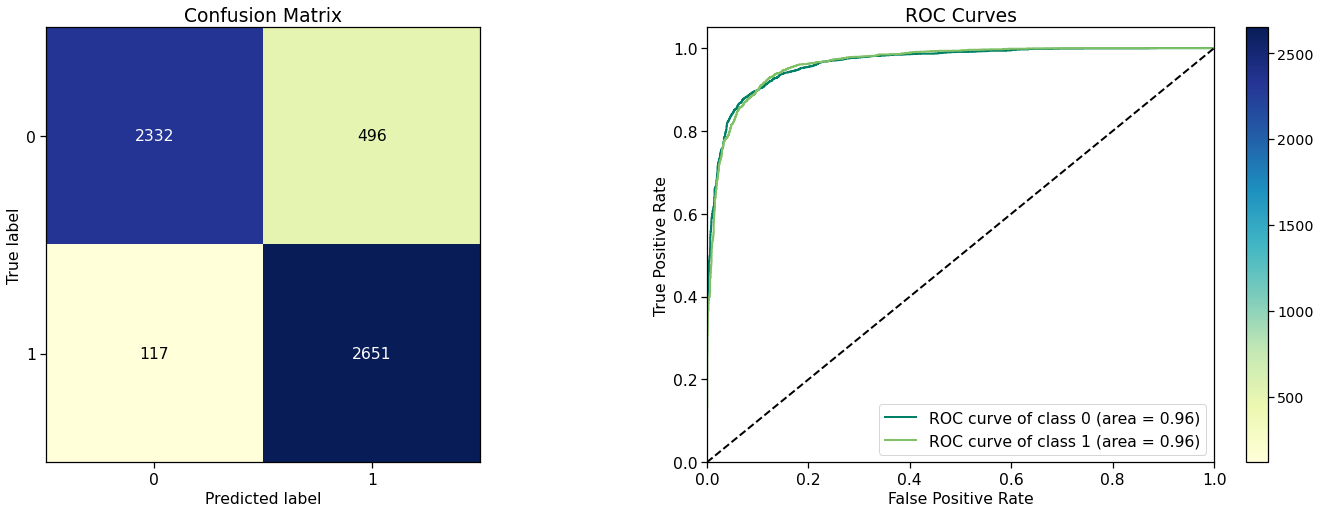

In [31]:
# Multinomial Naive Bayes classifier
nb = MultinomialNB()
train_model(nb)

## 7. Classification approach

Naive Bayes has some drawbacks in sentiment analysis. First, it assumes independence between features, which is generally not true for text data. Additionally, it struggles with capturing complex relationships and nuances in the English language. <br>
In this section, I will be building my model using Random Forest and Long Short Term Memory (LSTM).
Random Forest and LSTM are better algorithms than Naive Bayes. Random Forest is capable of handling non-linear relationships, handle high-dimensional data, and reduce overfitting. LSTM, a specialised type of recurrent neural network, is able to capture sequential patterns and contextual information, making it apt for sentiment analysis where word orders matter. These models better capture more nuanced sentiment information and have proven to output better results compared to Naive Bayes.

### Random Forest Classifier
Random forest is a machine learning algorithm that has the ability to handle high-dimensional data, capture non-linear relationships, and reduce overfitting. It constructs an ensemble of decision trees and aggregates their predictions into a single result. 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2828
           1       0.88      0.90      0.89      2768

    accuracy                           0.89      5596
   macro avg       0.89      0.89      0.89      5596
weighted avg       0.89      0.89      0.89      5596



/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/scikitplot/metrics.py:156: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(mappable=image)


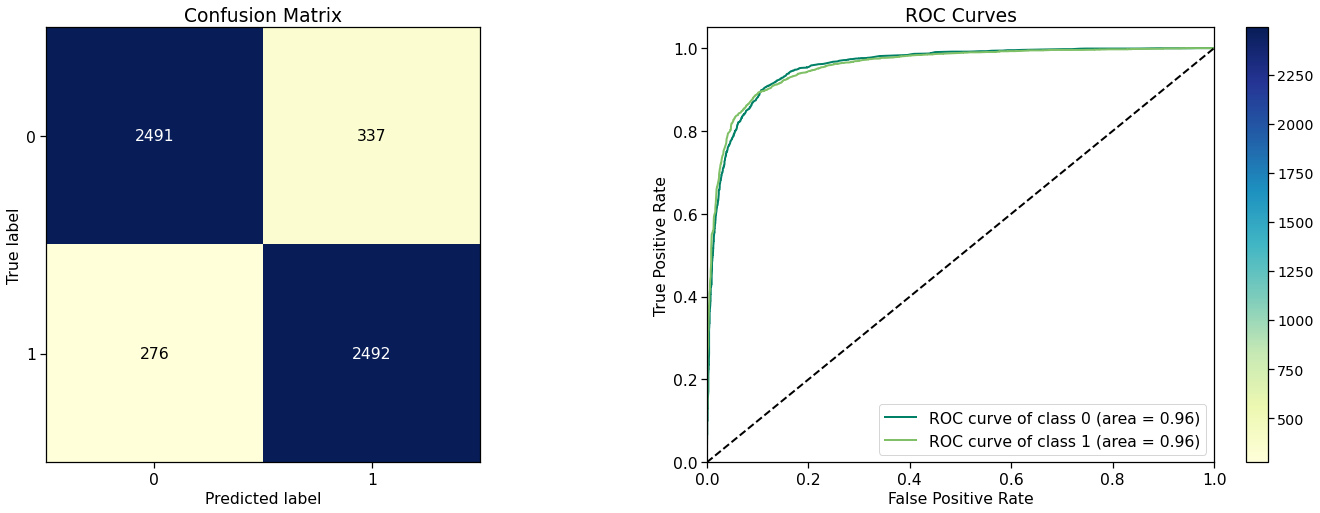

In [32]:
# Random Forest
rf = RandomForestClassifier(n_estimators=300) #300 decision trees
train_model(rf)

Based on the confusion matrices for the Naive Bayes Model and the Random Forest model, the Random Forest model outperformed the Naive Bayes model in terms of capturing more true positives and less false negatives. The Random Forest model achieved a higher number of true positives (2491) compared to the Naive Bayes model (2332), proving its ability to correctly classifying positive sentiments better. Additionally, the former achieved fewer false negatives (2492) than the former (2651). Hence, The Random Forest model demonstrated better performance in capturing positive classes compared to the Naive Bayes model, resulting in a more balanced and accurate classification outcome.

While Random Forest is better than Naive Bayes, it struggles to capture intricate word relationships and nuances in sentiment analysis. On the other hand, LSTM's strengths lie in its ability to capture sequential patterns and contextual information, making it suitable for sentiment analysis tasks

### Long Short Term Memory (LSTM)
LSTM takes word dependencies into account and learns from the sequential structure of the data. It can capture long-range dependencies between words, which is crucial for understanding sentiment. Even though Random Forest can also handle non-linearity, LSTM's ability to model sequential data better captures the temporal nature of language and the contextual nuances associated with sentiment. 

#### Split data into training and testing sets 
The dataset is divided into training and testing sets in a 80:20 ratio. The training set is used for training the model and the testing set is used as a collection of data points that will help to assess the performance of the model in generalising new, unseen data.

In [33]:
X = data["text"]
y = data["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

#### Tokenize text and pad sequences

In [34]:
max_words = 5000
max_len = 100


# ensure all sequences in a list have the same length
def tokenize_pad_sequences(text):
    # initialise text tokenizer
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=" ")
    
    # generate word indexes
    tokenizer.fit_on_texts(text)
    
    # transforms text to a sequence of integers and apply padding 
    X = tokenizer.texts_to_sequences(text)
    X = pad_sequences(X, padding='post', maxlen=max_len) #post padding  
    
    # return sequences 
    return X, tokenizer

print("Before tokenisation and padding: \n", data['text'][0], '\n')
X, tokenizer = tokenize_pad_sequences(data['text'])
print('After tokenization and padding: \n', X[0])    

Before tokenisation and padding: 
 dear american teen question dutch person heard guy get way easier thing learn age us sooooo thth grader like right guy learn math 

After tokenization and padding: 
 [1449  726  808  293 4270   68  570  108    5   37  775   21  342  349
  159    2   71  108  342 1032    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


#### Split dataset into training, testing and validation sets

In [35]:
y = data.label 
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# validation set
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print("Train: ", X_trn.shape, y_trn.shape)
print("Validation Set: ", X_vld.shape, y_vld.shape)
print("Test Set: ", X_tst.shape, y_tst.shape)

Train:  (15666, 100) (15666,)
Validation Set:  (6715, 100) (6715,)
Test Set:  (5596, 100) (5596,)


#### Building the LSTM Model

In [36]:
vocab_size = 5000
embedding_size = 32
epochs=50 #no. of iterations on training set

# create a sequential model 
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu')) # conv to capture local patterns and features
model.add(MaxPooling1D(pool_size=2)) #max pooling to reduce spatial dimensions and extract most important features


model.add(Bidirectional(LSTM(32))) #bidirectional to training sequence data forwards and backwards
model.add(Dropout(0.4)) #prevent overfitting
model.add(Dense(1, activation='sigmoid')) #produce binary classification

#plot_model(model, show_shapes = True)

2023-07-16 19:48:09.124385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=[tf.keras.metrics.Recall(),'accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [38]:
# monitor validation loss during training 
# stop training if validation loss does not improve for 5 epochs 
es = EarlyStopping(monitor = 'val_loss', patience=5)
batch_size = 64

# train model
history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
245/245 [==============================] - 10s 30ms/step - loss: 0.6917 - recall: 0.3093 - accuracy: 0.5364 - val_loss: 0.6903 - val_recall: 0.3279 - val_accuracy: 0.6095
Epoch 2/50
245/245 [==============================] - 7s 28ms/step - loss: 0.6892 - recall: 0.2957 - accuracy: 0.5744 - val_loss: 0.6877 - val_recall: 0.3752 - val_accuracy: 0.6159
Epoch 3/50
245/245 [==============================] - 7s 28ms/step - loss: 0.6862 - recall: 0.4389 - accuracy: 0.6012 - val_loss: 0.6836 - val_recall: 0.3255 - val_accuracy: 0.6097
Epoch 4/50
245/245 [==============================] - 7s 29ms/step - loss: 0.6815 - recall: 0.4042 - accuracy: 0.6044 - val_loss: 0.6770 - val_recall: 0.3433 - val_accuracy: 0.6149
Epoch 5/50
245/245 [==============================] - 7s 28ms/step - loss: 0.6723 - recall: 0.3973 - accuracy: 0.6161 - val_loss: 0.6645 - val_recall: 0.3601 - val_accuracy: 0.6180
Epoch 6/50
245/245 [==============================] - 7s 28ms/step - loss: 0.6580 - recall: 0.

245/245 [==============================] - 7s 27ms/step - loss: 0.2087 - recall: 0.9153 - accuracy: 0.9224 - val_loss: 0.2581 - val_recall: 0.8868 - val_accuracy: 0.8999
Epoch 47/50
245/245 [==============================] - 9s 36ms/step - loss: 0.2040 - recall: 0.9201 - accuracy: 0.9245 - val_loss: 0.2680 - val_recall: 0.9280 - val_accuracy: 0.9017
Epoch 48/50
245/245 [==============================] - 9s 38ms/step - loss: 0.2060 - recall: 0.9205 - accuracy: 0.9251 - val_loss: 0.3082 - val_recall: 0.9593 - val_accuracy: 0.8801
Epoch 49/50
245/245 [==============================] - 9s 35ms/step - loss: 0.2029 - recall: 0.9224 - accuracy: 0.9252 - val_loss: 0.2657 - val_recall: 0.9383 - val_accuracy: 0.8998
Epoch 50/50
245/245 [==============================] - 9s 36ms/step - loss: 0.1932 - recall: 0.9312 - accuracy: 0.9304 - val_loss: 0.2545 - val_recall: 0.9214 - val_accuracy: 0.9039


#### Validation Loss and Accuracy graphs
The validation loss measures the discrepancy between the predicted and true labels on the validation dataset. 
The validation accuracy represents the proportion of correctly predicted instances relative to the total number of instances in the validation dataset.  

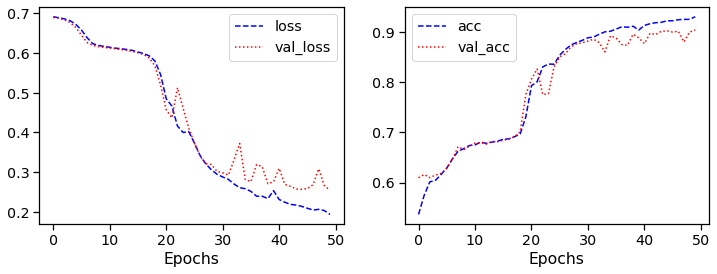

In [39]:
plt.figure(figsize=(12, 4))

# plot validation loss graph
# illustrates how loss changes over the course of training
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

# plot validation accuracy graph 
# shows how the model's performance evolves during training. 
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()


In [40]:
loss, accuracy,recall= model.evaluate(X_tst, y_tst, verbose=0)
score = model.evaluate(X_tst, y_tst, verbose=0)
# Print metrics
print('Accuracy  : {:.4f}'.format(accuracy)) 
print('Recall  : {:.4f}'.format(recall))

Accuracy  : 0.9227
Recall  : 0.9053


## 8. Coding style

# III. Conclusions

## 9. Evaluation 

<b> LSTM vs RF </b> <br>
LSTM model outperformed the Random Forest model in terms of accuracy and recall. The LSTM model achieved an accuracy of 0.9267 while the Random Forest model achieved an accuracy of 0.89.

For recall, the LSTM model achieved a score of 0.9053, showing that it successfully identified 90.53% of the positive instances. The Random Forest model, on the other hand, achieved a weighted average recall score of 0.89.

The results show that when compared to the Random Forest model, the LSTM model exhibited a slightly higher overall accuracy and a marginally greater capacity to classify positive classes. The LSTM model performed better in correctly predicting outcomes across both groups, as evidenced by its increased accuracy. Furthermore, the greater recall score for the LSTM model shows that it accurately recorded a higher percentage of positive classes, which can be particularly significant in sentiment analysis where identifying positive sentiment is vital.
<br>    
<b>LSTM vs NB </b> <br>
LSTM model outperformed the Naive Bayes model in terms of accuracy and recall. The LSTM model achieved a higher accuracy of 0.9267 while the Naive Bayes model had an accuracy of 0.89.

With recall, the LSTM model attained a recall score of 0.9053, accurately identifying 90.53% of the positive instances. The Naive Bayes model, on the other hand, achieved a weighted average recall score of 0.89 for positive instances.

The results show that the LSTM model exhibited greater overall accuracy and better ability to identify positive instances. The LSTM model's higher accuracy indicates its effectiveness in making correct predictions overall.

<br>
Overall, the outcomes reveal that the LSTM model outperformed both the Random Forest model and the Naive Bayes model, highlighting its effectiveness in sentiment analysis tasks.

### Testing the model

In [41]:
def decode_sentiment(score):
    if score < 0.5:
        sentiment = "NEGATIVE"
        return sentiment
    elif score >= 0.5:
        sentiment = "POSITIVE"
        return sentiment 

In [42]:
def predict(text):
    X_tst = tokenize_pad_sequences(data['text'])
    p = model.predict([X_tst[0]])[0]
    z = decode_sentiment(p)
    
    return {"sentiment": z, "score": float(p)}

In [43]:
predict("i hate this")

875/875 [==============================] - 6s 6ms/step


{'sentiment': 'NEGATIVE', 'score': 0.01037669274955988}

## 10. Summary and Conclusions

The project demonstrates a high level of originality, ambition, and novelty in the domain of mental health and sentiment analysis. The project intersects sentiment analysis and mental health contributing towards the advancement of proactive mental health assessment. It brings together expertise from both domains and expands the application of NLP techniques in mental health assessment.  Being able to determine individuals who may require intervention and support is extremely crucial for mental health professionals. 

In terms of novelty, this project stands out as it integrates sentiment analysis and mental health detection. While these areas have been explored independently, the combination to identify signs of mental issues using social media text is relatively unique. 

The project bridges the gap between sentiment analysis and mental health. This demonstrates the potential for other creative applications of sentiment analysis techniques. The sentiment analysis methods can be adapted and applied to various text classification tasks in diverse fields. The methodologies used, data preprocessing, feature extraction and model training can be tailored accordingly to suit other problem domains that call for sentiment analysis.

The project can easily be replicated by others with different programming languages, development environments, libraries, and algorithms. The core principles of sentiment analysis and machine learning remain applicable regardless of the specific tools and frameworks employed. Different programming languages (i.e. Java and C), development environments (i.e. Jupyter Notebook and PyCharm), libraries (i.e. scikit-learn or TensorFlow), and various algorithms (i.e support vector machine, K-Nearest Neighbour) can be utilised to achieve similar results.

A future improvement that can be incorporated to enhance the project would be utilising word embeddings like word2vec or GloVe. Word embeddings capture semantic and contextual information, allowing the model to better understand the meaning and relationships between words. This can potentially improve the model's performance, particularly in capturing more nuanced sentiment patterns and addressing challenges like out-of-vocabulary words.

# References

https://towardsdatascience.com/how-to-tokenize-and-pad-sequences-in-tensorflow-fcbbf2e8b3b5
    
https://faroit.com/keras-docs/1.2.0/getting-started/sequential-model-guide/

https://www.kaggle.com/datasets/reihanenamdari/mental-health-corpus

https://www.kaggle.com/code/sasakitetsuya/mental-health-classifier-nlp/notebook#Modeling

https://www.kaggle.com/code/rohan8771/mental-health-corpus-glove-lstm-91/notebook

https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis/comments

https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners/notebook

https://www.nimh.nih.gov/funding/grant-writing-and-application-process/concept-clearances/2022/understanding-social-media-and-youth-mental-health